In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

# dane
years= np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
populations = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])
m = np.arange(7)
true_year=1990
true_population=248709873

In [2]:
def approx(x, y, m):
    p = Polynomial.fit(x, y, m)
    return p
def extrapolate(p, x):
    return p(x)


In [3]:
def relative_error(y, y_hat):
    return np.abs(y - y_hat) / y

In [4]:
def optimize(x, y, m):
    p = approx(x, y, m)
    y_hat = extrapolate(p, true_year)
    return relative_error(true_population, y_hat)

In [5]:
errors = np.array([optimize(years, populations, i) for i in m])
df = pd.DataFrame({"stopień": np.arange(7), "błąd względny": np.round(errors*100,2)})
print(df.to_latex())

\begin{tabular}{lrr}
\toprule
 & stopień & błąd względny \\
\midrule
0 & 0 & 42.350000 \\
1 & 1 & 5.190000 \\
2 & 2 & 2.410000 \\
3 & 3 & 5.120000 \\
4 & 4 & 2.250000 \\
5 & 5 & 11.370000 \\
6 & 6 & 2.550000 \\
\bottomrule
\end{tabular}



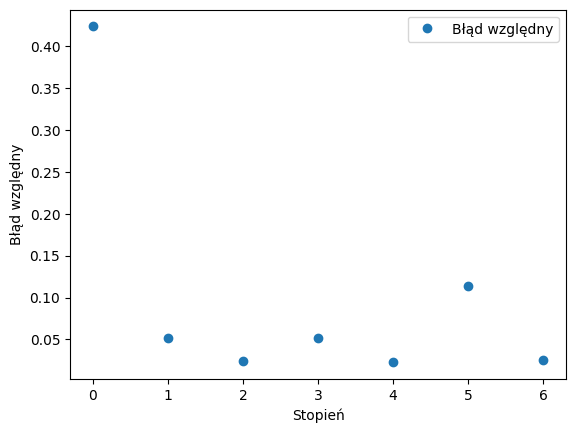

Najlepszy stopień wielomianu: 4
Błąd względny dla najlepszego stopnia wielomianu: 2.25%


In [6]:


plt.plot(m, errors,'o', label='Błąd względny')
plt.xlabel('Stopień')
plt.ylabel('Błąd względny')
plt.legend()
plt.show()
best_m = m[np.argmin(errors)]
print(f'Najlepszy stopień wielomianu: {best_m}')
print(f'Błąd względny dla najlepszego stopnia wielomianu: {round(errors[best_m]*100,2)}%')

In [7]:
# aproksymacja dla najlepszego stopnia wielomianu
p = approx(years, populations, best_m)
y_hat = extrapolate(p, true_year)
print(f'Wartość ekstrapolowana dla roku 1990: {y_hat}')


Wartość ekstrapolowana dla roku 1990: 243106970.94444484


In [8]:
# kryterium informacyjne Akaikego
def AIC(y, y_hat, k):
    n = len(y)
    return 2 * k + n * np.log(np.sum((y - y_hat) ** 2) / n)

# funkcja kryterium informacyjnego Akaikego ze składnikiem koregującym

def AICc(y, y_hat, k):
    n = len(y)
    return AIC(y, y_hat, k) + 2 * k * (k + 1) / (n - k - 1)

[318.43954648 285.62790669 274.6533739  277.68040169 278.92858147
 287.25819942 309.26544509]
Najlepszy stopień wielomianu wg AICc: 2
Wartość kryterium informacyjnego Akaikego z korektą dla najlepszego stopnia wielomianu: 274.6533738965972


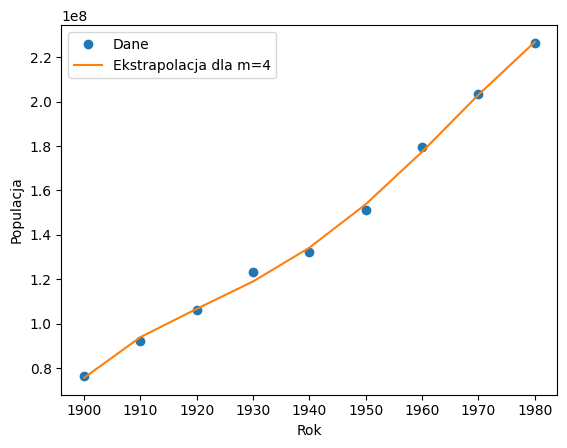

In [9]:
# kryterium informacyjne Akaikego z korektą

aic_c = np.array([AICc(populations, extrapolate(approx(years, populations, i), years), i) for i in m])
best_aic_c = m[np.argmin(aic_c)]
print(aic_c)
print(f'Najlepszy stopień wielomianu wg AICc: {best_aic_c}')
print(f'Wartość kryterium informacyjnego Akaikego z korektą dla najlepszego stopnia wielomianu: {aic_c[best_aic_c]}')

# wykres

plt.plot(years, populations, 'o', label='Dane')
plt.plot(years, extrapolate(p, years), label=f'Ekstrapolacja dla m={best_m}')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.show()

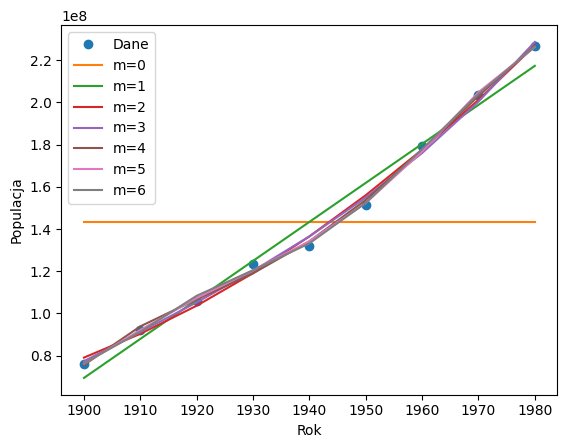

In [10]:
plt.plot(years, populations, 'o', label='Dane')
for i in m:
    plt.plot(years, extrapolate(approx(years, populations, i), years), label=f'm={i}')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from numpy.polynomial.chebyshev import Chebyshev

In [12]:
def f(x):
    return np.sqrt(x)

In [13]:
def w(x):
    t=x-1
    return (1-t**2)**(-1/2)
def T(k,x):
    x=x-1
    return np.cos(k*np.arccos(x))
def phi(k):
    return np.pi if k==0 else np.pi/2
def c(k):
    c, _ = quad(lambda x: T(k,x)*f(x)*w(x), 0, 2)
    c=c/phi(k)
    return c
def p_gwiazdka(m):
    ck=[]
    for k in range(m+1):
        ck.append(c(k))
    p  = Chebyshev(ck, domain=(0,2))
    return p

In [14]:
def approx(m):
    return p_gwiazdka(m)

0.90031632 + 0.60021088 T_1(x) - 0.12004218 T_2(x)
[0.18006326323181, 0.20179112970613478, 0.22332302895182998, 0.2446589609688954, 0.26579892575733144, 0.2867429233171378, 0.3074909536483147, 0.328043016750862, 0.3483991126247795, 0.3685592412700677, 0.38852340268672614, 0.4082915968747549, 0.4278638238341542, 0.44724008356492406, 0.4664203760670642, 0.4854047013405747, 0.5041930593854558, 0.5227854502017071, 0.5411818737893289, 0.5593823301483211, 0.5773868192786837, 0.5951953411804168, 0.6128078958535201, 0.6302244832979942, 0.6474451035138384, 0.6644697565010531, 0.6812984422596382, 0.6979311607895938, 0.7143679120909198, 0.730608696163616, 0.7466535130076829, 0.7625023626231201, 0.7781552450099277, 0.7936121601681058, 0.8088731080976542, 0.8239380887985731, 0.8388071022708623, 0.853480148514522, 0.8679572275295522, 0.8822383393159527, 0.8963234838737237, 0.910212661202865, 0.9239058713033768, 0.937403114175259, 0.9507043898185116, 0.9638096982331347, 0.9767190394191281, 0.98943241

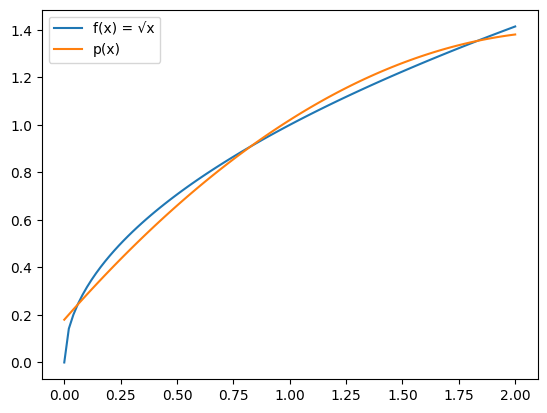

In [15]:
x = np.linspace(0, 2, 100)
y = f(x)
m = 2
p = approx(m)
y_hat = [p(x_) for x_ in x]
print(p)
print(y_hat)

# wykres
plt.plot(x, y, label='f(x) = √x')
plt.plot(x, y_hat, label='p(x)')
plt.legend()
plt.show()